In [ ]:
#downloading the dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-15 19:30:14--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt.1’

input.txt.1         100%[===================>]   1.06M  5.98MB/s    in 0.2s    

2024-01-15 19:30:14 (5.98 MB/s) - ‘input.txt.1’ saved [1115394/1115394]



In [ ]:
#reading the file
with open('input.txt','r',encoding='utf-8') as f:
  text=f.read()

In [ ]:
print("length of the dataset in characters:",len(text))

length of the dataset in characters: 1115394


In [ ]:
type(text)

str

In [ ]:
print(text[:1000])# just checking the first 1000 characters

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [ ]:
#to get all the characters in the dataset
chars=sorted(list(set(text)))# when you use set it will get rid of the repetition and then we structure it with list and then sort it
vocab_size=len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


print(''.join(chars)):
 Concatenates the sorted characters into a single string using an empty string '' as the separator. This means that each character in the chars list will be joined together without any space or other characters in between.

In [ ]:
#now it is time to tokenize the text, it means that convert the raw text as string to set of integers based on a dictionary
#we are building both encoder and decoder
#encoder: take a string, output a list of integers
stoi={ch:i for i,ch in enumerate(chars)}#making the dictionaries
itos={i:ch for i,ch in enumerate(chars)}
encode=lambda s:[stoi[c] for c in s] #lambda arguments: expression
decode=lambda l:''.join([itos[i] for i in l])#decoder: take a list of integer and outputs string

print(encode("hello world"))
print(decode(encode("hello world")))

[46, 43, 50, 50, 53, 1, 61, 53, 56, 50, 42]
hello world


In [ ]:
#now we have to tokenize our text dataset using the tokenization dictionary we just made
import torch
data=torch.tensor(encode(text),dtype=torch.long)# we have to encode the text and wrap it in torch tensor

the difference between pd.dataframe pd.series and torch tensors:

Differences:

Dimensionality:


Tensors can have any number of dimensions (1D, 2D, 3D, etc.), whereas pandas Series are 1D and DataFrames are 2D.

Labels:


Tensors typically don't have labeled axes. They are accessed by indices or coordinates.

Pandas Series and DataFrames have labeled axes (rows and columns), allowing for more descriptive and intuitive data manipulation.
Operations:


Tensors are designed for numerical operations, often used in scientific and machine learning contexts.

Pandas DataFrames and Series are built on top of NumPy and are more focused on data manipulation and analysis with a variety of operations beyond numerical calculations.

In [ ]:
print(data.shape, data[:1000])# the 1000 character we looked at earlier  will look like this to GPT

torch.Size([1115394]) tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
        47, 59, 57

In [ ]:
#now time for train test split hooray
n=int(0.9*len(data))#first 90% is train and the rest is test
print(len(data),data.shape)
train_data=data[:n]
val_data=data[n:]

1115394 torch.Size([1115394])


when we want to train the transformer we dont just feed all the train data set to the transformer all at once because that is computationally inefficient so instead we just feed it in chunks at a time

now these chunks have maximum lengths: the max length is called block size or context lenght

In [ ]:
block_size=8
train_data[:block_size+1] #because we only have block_size of samples for input

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

above if we have 18 as input the output is 47 if we have 18,47 the output is 56, if we have 18,47,56 as inputs we have 58 as output and so on so this way it is going to be only 8 samples like this

In [ ]:
x_train=train_data[:block_size]
y_train=train_data[block_size]
x_train,y_train

(tensor([18, 47, 56, 57, 58,  1, 15, 47]), tensor(58))

In [ ]:
#this is just an example for clarification and explanation
for i in range(1,block_size+1):
  x_train=train_data[:i]
  y_train=train_data[i]
  print(f"when the input is {x_train}, the output is {y_train}")

when the input is tensor([18]), the output is 47
when the input is tensor([18, 47]), the output is 56
when the input is tensor([18, 47, 56]), the output is 57
when the input is tensor([18, 47, 56, 57]), the output is 58
when the input is tensor([18, 47, 56, 57, 58]), the output is 1
when the input is tensor([18, 47, 56, 57, 58,  1]), the output is 15
when the input is tensor([18, 47, 56, 57, 58,  1, 15]), the output is 47
when the input is tensor([18, 47, 56, 57, 58,  1, 15, 47]), the output is 58


we train on all the examples above
so we make the transformer see all the cases little as one block sizse to 8

we need one more dimension:batch dimension

mini batches of multiple chunks of text

we want to process multiple chunks of data in parellel and independently

When you set a seed using this function, it ensures that the random numbers generated by PyTorch operations are reproducible. In other words, if you run your PyTorch code multiple times with the same seed, you will get the same set of random numbers each time.

In [ ]:
#because gpus are good at parellel processing the data and we want to keep the transformers busy
# we have to choose random locations of dataset to pull chunks from we set the seed in the random number generator so the number are going to be the same everytime we generate
torch.manual_seed(1337)
batch_size=4 # how many independent sequence will we process in parellel?
block_size=8 # what is the max context length for predictions
def get_batch(split):
  #generate a small batch of data of inputs x and targets y
  data=train_data if split =='train' else val_data
  ix=torch.randint(len(data)-block_size, (batch_size,)) #generate batch_size numbr of random offsets, ix is going to be 4 numbers randomly generated between len(data)-blocksize
  x=torch.stack([data[i:i+block_size]for i in ix])# we use toch.stack to use all those one dimensional tensors and stack them uo as rows so here the size is batch_size*block_size
  y=torch.stack([data[i+1:i+block_size+1]for i in ix])# y is offset by 1 of the x in the above line
  #since we have to pass list to torch.stack we put the tensor data[i:i+block_size]for i in ix in [ ]
  return x,y

torch.randint(len(data) - block_size, (batch_size,)): This line generates a tensor (ix) containing batch_size random integers. These integers are used as offsets to determine the starting indices for blocks of data within the range [0, len(data) - block_size).

So, if batch_size is 4, this line generates 4 random indices (ix) within the valid range. Each index corresponds to the starting position of a block of data. These blocks could be used, for example, for creating batches in a machine learning training loop, where each batch is a subset of the data starting from a random position.

The term "offset" refers to the starting position or index within the data where a block of data will begin

In [ ]:
xb,yb=get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

for i in range(xb.shape[0]):
  for f in range(1,xb.shape[1]):
    input=xb[i,:f]
    output=yb[i,f-1]
    print(f"input for {input.tolist()} is output : {output}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
input for [24] is output : 43
input for [24, 43] is output : 58
input for [24, 43, 58] is output : 5
input for [24, 43, 58, 5] is output : 57
input for [24, 43, 58, 5, 57] is output : 1
input for [24, 43, 58, 5, 57, 1] is output : 46
input for [24, 43, 58, 5, 57, 1, 46] is output : 43
input for [44] is output : 53
input for [44, 53] is output : 56
input for [44, 53, 56] is output : 1
input for [44, 53, 56, 1] is output : 58
input for [44, 53, 56, 1, 58] is output : 46
input for [44, 53, 56, 1, 58, 46] is output : 39
input for [44, 53, 56, 1, 58, 46, 39] is output : 58
input for [52] is output : 58
in

so these are the 32 independent example packed in to a single batch of input x and the desired tragets are in y


now the transformer is going to process all of these examples simultaneously

above we have 4 independent rows and 4 columns and each row is independent as far as transoformer's concern

In [ ]:
xb#now we have our batch of input that we want to feed into the transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])

**building the language model**

In [ ]:
#the simplest language model is bigram language model;
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)
n_embd=32
class BigramLanguageModel(nn.Module): #this means the class we are making is the subclass of nn.module
  #creating token embedding label

  def __init__(self,vocab_sizse):
    super().__init__() #v
    #each token directly reads off the logits for the next token from a lookup table,  this is similar to count table but it is trainable
    self.token_embedding_table=nn.Embedding(vocab_size,vocab_size) #creates an embedding layer where each token in the vocabulary can be represented as a one-hot vector

    #create a linear of indirection through a linear layer
    # self.token_embedding_table=nn.Embedding(vocab_size,n_embd)#number of embedding dimensions
    # self.position_embedding_table=nn.Embedding(block_size,n_embd)#(T,C)    #another thing to have is the position embedding label to also train based on the position of the characters and words
    # self.lm_head=nn.Linear(n_embd,vocab_size)#we need a linear layer to go from the token embeddings to logits, the line above gives us only token embeddings

  def forward(self,idx,targets=None):
    B,T=idx.shape

    #idx and targets are both (B,T) tensor of integers :where B is the batch size and T is the sequence length.
    logits=self.token_embedding_table(idx) #(B,T,C)

    # tok_emb=self.token_embedding_table(idx)#(B,T,C)
    # pos_emb=self.position_embedding_table(torch.arange(T))
    # x=tok_emb+pos_emb #(B,T,C) #it gets broadcasted # x holdd the token identities and the positions
    # logits=self.lm_head(x)#(B,T,vocab_size)

    if targets is None:
      loss=None
    else:
      B,T,C=logits.shape
      #since the shape of logits is (B,T,C) and the shape of the targets is (B,T) and cross_entropy wants the c to be in the middle
      logits=logits.view(B*T,C)#making it two dimensional
      targets=targets.view(B*T)

      loss=F.cross_entropy(logits, targets)#cross entropy is basically the maximum likelihood

    return logits,loss

  def generate(self, idx, max_new_tokens):#its job is to get the idx and continue the generation in all the batch dimensions in the time dimension T
    #idx is the current context of some characters in a batch and its (B,T)
    for _ in range(max_new_tokens):
      #get the predictions
      logits,loss=self(idx)
      #focus only on the last time step
      logits=logits[:,-1,:]#becomes (B,C)
      #apply softmax to get the probabilities
      probs=F.softmax(logits,dim=-1)
      #sample from the distribution
      idx_next=torch.multinomial(probs,num_samples=1) #(B,1)
      #append sampled index to the running sequence
      idx=torch.cat((idx, idx_next),dim=1)
    return idx

m=BigramLanguageModel(vocab_size)
logits, loss=m(xb,yb)
print(loss)
print(decode(m.generate(torch.zeros((1,1),dtype=torch.long),max_new_tokens=100)[0].tolist()))

tensor(4.7383, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


Embedding
Purpose: Embeddings are a step beyond basic encoding. They transform encoded data into a format where the relationships and contextual information between data points are better captured. Embeddings map data to a higher-dimensional space where similar items are closer together, facilitating more complex analysis and pattern recognition.
Example: The nn.Embedding layer in PyTorch is used to learn an embedding for each token in your vocabulary. Even though each token is already encoded as an integer, the embedding layer learns a dense, floating-point representation for each token, where the distance between vectors captures more semantic information than the raw encodings.

updated model with the positional embeddings:

nn.Embedding(vocab_size, n_embd):

This is still an embedding layer, but now each token is embedded into a space of n_embd dimensions instead of vocab_size.
It's common in NLP models to choose an embedding dimension (n_embd) smaller than vocab_size for efficiency and to capture semantic information in a denser form.
Output shape for (B, T) input: (B, T, n_embd).
nn.Embedding(block_size, n_embd):

This is the positional embedding layer. It's used to give the model information about the position of each token within a sequence.
Positional embeddings are crucial in models without recurrent structure (like Transformers) as they allow the model to understand the order of tokens.
block_size is typically the maximum length of the sequences you're processing (T).
Each position in a sequence gets mapped to a vector of size n_embd.
Output shape for (T,) input: (T, n_embd).
Combining Token and Position Embeddings:

tok_emb is the token embeddings with shape (B, T, n_embd).
pos_emb is the positional embeddings with shape (T, n_embd).
When you add tok_emb and pos_emb, positional information is incorporated into the token embeddings.
Broadcasting happens here: pos_emb is automatically expanded to match the batch dimension B of tok_emb.
The resulting x has the shape (B, T, n_embd).
nn.Linear(n_embd, vocab_size):

This linear layer (also known as a fully connected layer) maps the combined embeddings to the output vocabulary space.
It's used to generate logits for each token in the vocabulary.
For each of the n_embd-dimensional embeddings in x, this layer produces a vocab_size-dimensional vector representing the raw scores (logits) for each possible next token.
Output shape: (B, T, vocab_size)

some concepts:

Semantic Information of Tokens:

"Semantic information" refers to the meaning or concept associated with each token (word or character). In the context of embeddings, each token is represented by a vector, and the idea is that these vectors capture some aspects of the token's meaning. For example, in high-quality embeddings, tokens with similar meanings tend to have similar vectors.
Are Logits Probabilities?:

No, logits are not probabilities. In the context of neural networks, logits are the raw, unnormalized scores (outputs of the final linear layer before applying an activation function like softmax). To convert logits to probabilities, you would typically apply the softmax function, which normalizes the logits so that they sum up to 1 and can be interpreted as probabilities.
Defining Layers in __init__ and Using Them in forward:

In PyTorch, layers and components of the model (like nn.Embedding, nn.Linear) are usually defined in the __init__ method of your model class. This is because they contain trainable parameters that should be initialized once and kept throughout the life of the model.
The forward method is then used to define how data flows through these layers when the model is used. This separation helps in organizing your model's structure and its operational logic.

**Optimization**

In [ ]:
#estimate_loss function
eval_iters=200 #hyperparameter for averaging the loss

@torch.no_grad()
def estimate_loss():
  out={}
  m.eval() #setting the model to evaluation phase :This is necessary because certain layers of the model (like dropout and batch normalization layers) behave differently during training and evaluation.
  for split in ['train','val']:
    losses=torch.zeros(eval_iters)
    for k in range(eval_iters):
      X,Y=get_batch(split)
      logits,loss=m(X,Y)
      losses[k]=loss.item()
    out[split]=losses.mean()
  m.train()

  return out

In [ ]:
#create a pytorch optimizer
optimizer=torch.optim.AdamW(m.parameters(),lr=1e-3)
batch_size=32
max_iters=1000
for iter in range(max_iters):

  #every once in a while evaluate the loss on train and val set
   if iter % eval_iters==0:
     losses=estimate_loss()

  # sample a batch of data
   xb,yb=get_batch('train')

   #evaluate the loss
   logits, loss=m(xb,yb)
   optimizer.zero_grad(set_to_none=True)
   loss.backward()
   optimizer.step()

#because every batch is more or less lucky its better to average over the losses
print(loss.item(),losses)


3.746224880218506 {'train': tensor(3.8949), 'val': tensor(3.8987)}


In [ ]:
print(decode(m.generate(torch.zeros((1,1),dtype=torch.long),max_new_tokens=1000)[0].tolist()))


po'lHX:wVV;T :CKA::.JWD.y'yx,cPanyeWT;UQmyhOFXXx:e
C!B$ghObsdZRTAco,
wWTEsqfjstwLECFU'DJ-Dq'hmZc;acfrc;abi-BD&yZIBGd,t3Ch
C'soiPNau$Js NXxEPIfFy viDJ;vnlIVxaVTqivpgZJJbfRo?wocHdNR.y,MPPszoTurno'XEc&ybcQLC&yxBffF$LI'y,Zv3fQ?OprNQXSxq-VReDq$&3a!GXe MttN!R ?dlaslgYZ3f?OV;ohdaNeZRIsAYQQJXRC?tiF-$&!d.harigLOjK? wa fxre'dea.mBL:CK$sren$Ackta CFqHeERTPHZbQ&ofFPH:pzyYiAL!?wszyinAXJsrd
WWmaw:3SPRystirFNAXeIB!
JGSPyxUL:Ml,faXYi-m -wWWkEHOE'ZX.?YhED&y;xcmbaUzRtWhoevMbjRqhr'TiOXpeSP,j pYzPmnpcOdgfNfqjDWr&yZwZ'ZT!.iK:Dycm,jxTE:qVrKpxars3vWyQNLTOhAG;?;acton-bXEs!heTa!a!cravU'  srehd;Ropw,md,SgmV&x-PlxHgIxEqllI,lx;h!$aXEagonuqR?cLILIkz; ep3SPd
julgRGrDxREbOKphiqK:'TyaXNCuAHo?ppHVjMP,jjs,.bXSjajX-LSYgYhis!
3s,rbha ?Od CUGr MIMPqHWtuxx;pYhTbownGbat-Du3SPlbxr3:P,3l,M;Q!a!hhlxlb'?ORSq'DUBivHLU3QoiwilybocksFONa:C-FdbXiByxr ju vVwiyaqbRUE:. zI&ySVlmnObOOWSju?hsErvrRSrbyZ fF.WyNMPID3bonWnrmJGX&V:CHxYlFlvesTo&viq-t$A:whiMmP gCV&E3SAriWWBT:zJKIKbHIJBUE;wsw$w;hothiFRjbepeayATE3fSUCHI' CVDHkFbVSOlv.

Wu!oVz;Rd

**The mathematical trick in self attention**

In [ ]:
#version 1
# we want x[b,T]=mean_{i<=t} x[b,i]
B,T,C=4,8,2
x=torch.randn(B,T,C)
xbow=torch.zeros((B,T,C))
for b in range(B):
  for t in range(T):
    xprev=x[b,:t+1]#(t,C)
    xbow[b,t]=torch.mean(xprev,0) #(B,C)

In [ ]:
#version 2 using lower traingular matrix multiplicaiton

wei=torch.tril(torch.ones(T,T))
wei=wei/torch.sum(wei,1,keepdim=True)

xbow2=wei @ x #(T,T) @(B,T,C)--->(B,T,T)@(B,T,C)--->(B,T,C)
#Batch Dimension B: The operation is applied batch-wise.
#Each T x T matrix in the first tensor is multiplied with the corresponding T x C matrix in the second tensor, #for each batch.

In [ ]:
#version 3 using softmax
tril=torch.tril(torch.ones(T,T))
wei=torch.zeros(T,T)
wei=wei.masked_fill(tril==0,float('-inf')) #wherever the tril is zero put -inf and the rest when tril is 1 keep the wei as it i

# we can use softmax because it works like a normalization operator:first it exponentiates and then it averages it
wei=F.softmax(wei,dim=-1)#softmax on every single row across the columns dim=-1 here means the last dimension of the tensor
xbow3=wei @ x


version 3 is better and we are going to use this version in self attention layer and the reason for that is because the wei start with zeros!

**implement small self-attention for single head**

In [ ]:
#version 4: self-attention!

torch.manual_seed(1337)
B,T,C=4,8,32 #batch, time, channel
x=torch.randn(B,T,C)

#let's see a single head perform self attention
head_size=16 #hyper parameter :size of each indivual attention head

#the weights of these linear layers are learnable #so the the weights of these linear models are initially random
key=nn.Linear(C,head_size,bias=False)#the linear layer transforms the last dimension of each vector in the tensor from c to head_size, while keeping the batch size and sequence length dimensions unchanged
query=nn.Linear(C,head_size,bias=False)
#these are being calculated in parellel :no communicaiton yet
k=key(x)# (B,T,head_size)
q=query(x)# (B,T,head_size)
#now its time for the communication
#calculating the attention weights:wei
wei= q@k.transpose(-2,-1)#(B,T,16)@(B,16,T)->(B,T,T): for each row of B->(T,16)@(16,T) because it is a batch matrix multiplication

tril=torch.tril(torch.ones(T,T))
# wei=torch.zeros(T,T)
wei=wei.masked_fill(tril==0,float('-inf')) #because we dont want any communication from future nodes(tokens)
wei=F.softmax(wei,dim=-1)# softmax kinda normalizes it
out=wei @ x

out.shape

torch.Size([4, 8, 32])

now each token know what content it has and knows also its position in the embedding space, now with the self attention solution every single node(token) at each position will emit 2 vectors :query and key, the query will give the information of: what the token is looking for and the key gives the information of: what do i contain and each are by initializing key and query by linear layers

In [ ]:
wei[0]# so since wei is now data dependant (key@query), it is not uniform any more like versions before and wei@x is not going to just give us a weighted avereage of the past tokens for each tokemn
#intead it is going to give us a data dependant information based on the key@query for each token

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

Attention Weights (wei):

The result of q @ k.transpose(-2, -1) gives you the raw attention scores before they are normalized.
For a given batch, each element wei[b, i, j] represents the raw attention score between the i-th and j-th tokens in the sequence. It is computed by taking the dot product of the i-th query vector with the j-th key vector.
These scores are typically passed through a softmax function to normalize them into actual attention weights that sum to 1 for each token.


If the values in a row of wei are similar, it suggests that the corresponding token (the query token) is paying similar levels of attention to multiple tokens in the sequence. This could happen in situations where the context is spread out or not strongly focused on any particular token.
Conversely, if one value in a row is much higher than the others, it indicates focused attention, where the model finds one specific token in the sequence to be particularly relevant for the current token.


In summary, the similarity in the numbers in the ith row of the attention weights indicates that the model is considering multiple tokens in the sequence to be relevant when determining the context or meaning of the ith token

**compeleting the single head self attention layer by adding the value matrix**

we dont aggregate wei directly into the tokens x, and thats why we introduce value

In [ ]:
#version 5: self-attention!

torch.manual_seed(1337)
B,T,C=4,8,32
x=torch.randn(B,T,C)

head_size=16

key=nn.Linear(C,head_size,bias=False)
query=nn.Linear(C,head_size,bias=False)
value=nn.Linear(C,head_size,bias=False)#added

k=key(x)
q=query(x)
wei= q@k.transpose(-2,-1)* C**-0.5 #C**-0.5 is explained below
v=value(x)#added: value is kinda like the private information of the x (value is what the token will comminucate to you)

tril=torch.tril(torch.ones(T,T))
wei=wei.masked_fill(tril==0,float('-inf')) #if you want all the nodes from past and future to talk to each other like in sentiment analysis or translation, you can delete this line of code and this means that we have encoder block but what we implemented is a decoder block because decoding has this autoregressive nature to it whereas encoder is non autoregressive
wei=F.softmax(wei,dim=-1)
out=wei @ v #modified

out.shape

torch.Size([4, 8, 16])

In [ ]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

and that was the self attention mechanism

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

Autoregressive is a term used in statistics and machine learning to describe models where the prediction of a variable at a future time point is made based on its own previous values.

the reason that the code above is self attention is that all the key, query and value come from the same source ,x. but in cross attention is when there is seperate source of nodes we want to pull information from , so when we have for example encoder decoder structures together, the query can come from x but key and value can come from different sources like the encoder in our structure

explaining the last item in notes:
if we have
key=torch.randn(C,head_size,bias=False)
query=torch.randn(C,head_size,bias=False)

wei= q @ k.transpose(-2,-1)
why is the variance of wei kinda close to head_size when the variance of key and query is 1
ChatGPT
The phenomenon you're describing—where the variance of the attention weights (wei) in a Transformer model is approximately equal to head_size when the variance of the key and query matrices is 1—can be explained through some basic concepts in linear algebra and statistics.

Here's a breakdown of why this happens:

Variance of Key and Query:

You've initialized key and query with random values where each element is drawn from a standard normal distribution (mean = 0, variance = 1).
In a standard normal distribution, most values fall within the range of -1 to 1, but their variance (which measures the average squared deviation from the mean) is 1.
Dot Product and Variance:

The operation wei = q @ k.transpose(-2, -1) involves computing the dot product between the query and key matrices.
When you take the dot product of two vectors, each from a normal distribution with variance 1, the variance of the resulting product is the product of the variances of those vectors, assuming they are independent.
However, since you're summing up head_size number of these products (as each key and query vector is of size head_size), the variance of the sum of independent random variables is the sum of their variances.


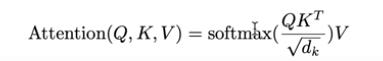


d_k is the number of head size

In [ ]:
#final code

import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


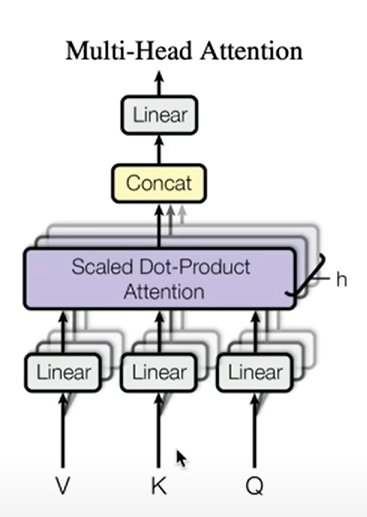

we only have implemented the decoder:

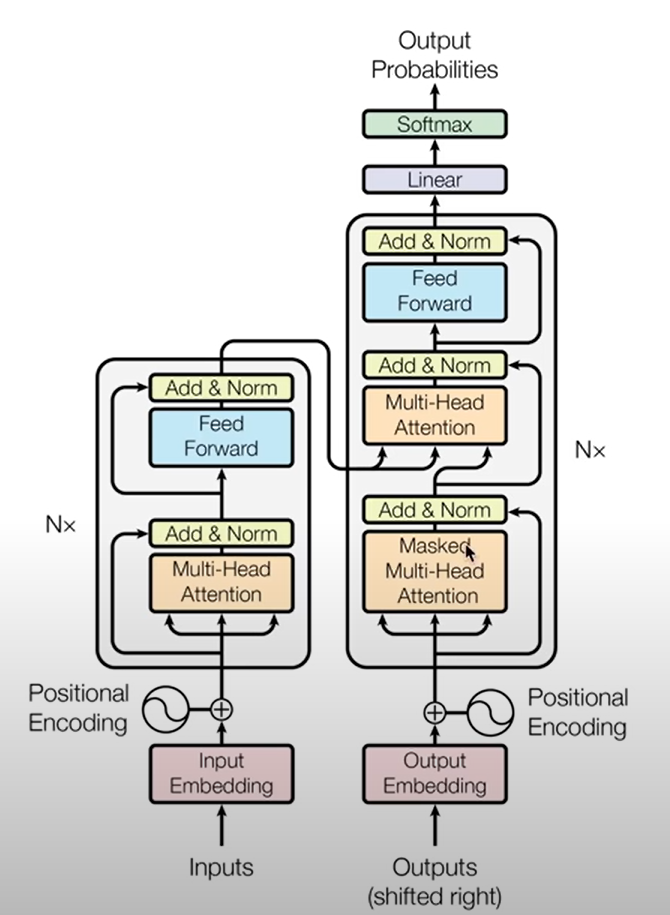